In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('D:/tadayon-heart/heart.csv')


In [7]:
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data = data.sample(frac=1).reset_index(drop=True)


In [9]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
2,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
3,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
4,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
299,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
300,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
301,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


<AxesSubplot:>

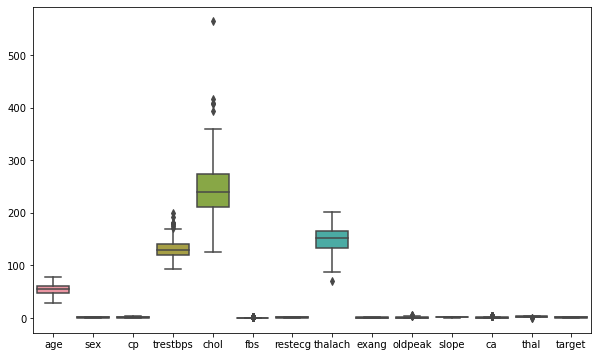

In [10]:
plt.figure(figsize=(10, 6))
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=data)

In [12]:
# scaled_data = data


In [13]:
# for i in data:
#     scaled_data[i] = (data[i]-data[i].mean())/data[i].std()
# data = pd.read_csv('Desktop/heart.csv')
cols_to_norm = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())

In [14]:
data['chol'].std()


1.0

<AxesSubplot:>

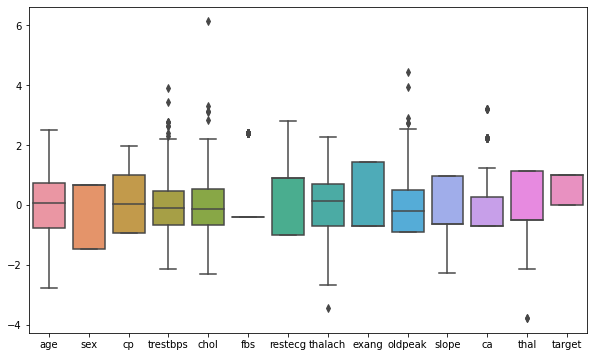

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

In [16]:
y = pd.DataFrame(data['target'])
# del scaled_data['target']

In [17]:
out_idx_log = data.abs() > 2.5


In [18]:
out_idx = []
for i in out_idx_log:
    for j, s in enumerate(out_idx_log[i]):        
        if(s == True):
            out_idx.append(j)

In [19]:
len(out_idx)


35

In [20]:
y.drop(out_idx, inplace=True)


In [21]:
data.drop(out_idx , inplace=True)


In [22]:
# y=y.reset_index()


<AxesSubplot:>

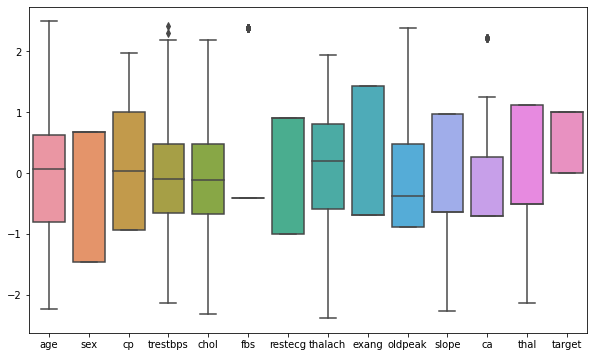

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

In [24]:
y


,target
0,0
2,1
3,0
5,1
6,1
...,...
298,0
299,0
300,1
301,1


In [25]:
data['target'] = y


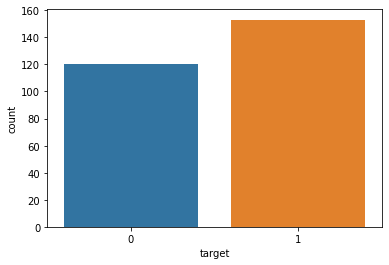

In [26]:
# sns.set_theme(style="darkgrid")
ax = sns.countplot(x='target', data=y)

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
# data = pd.read_csv('Desktop/heart.csv')
# data = data.apply(lambda x: (x - x.mean()) / x.std())    
p = data[data['target'] == 1]
n = data[data['target'] == 0]

In [29]:
# data = pd.read_csv('Desktop/heart.csv')
# cols_to_norm = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std()) 
p_y = p['target']
n_y = n['target']
del p['target']
del n['target']
y = pd.DataFrame(data['target'])
del data['target']
# x = data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)


In [31]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [33]:
p = X_train[y_train['target'] == 1]
p_y = y_train[y_train['target'] == 1]
n = X_train[y_train['target'] == 0]
n_y = y_train[y_train['target'] == 0]

In [34]:
y_train['target']


0      1
1      1
2      1
3      1
4      1
      ..
213    1
214    0
215    1
216    1
217    1
Name: target, Length: 218, dtype: int64

In [35]:
means_p = pd.DataFrame(columns=['chol','thalach','trestbps'])


In [36]:
means_n = pd.DataFrame(columns=['chol','thalach','trestbps'])


In [37]:
stds_p = pd.DataFrame(columns=['chol','thalach','trestbps'])
stds_n = pd.DataFrame(columns=['chol','thalach','trestbps'])


In [38]:
means_p = means_p.append({'chol' : p['chol'].mean(),
                    'thalach' : p['thalach'].mean(),
                    'trestbps' : p['trestbps'].mean()} , 
                    ignore_index=True)

In [39]:
means_n = means_n.append({'chol' : n['chol'].mean(),
                    'thalach' : n['thalach'].mean(),
                    'trestbps' : n['trestbps'].mean()} , 
                    ignore_index=True)

In [40]:
stds_p = stds_p.append({'chol' : p['chol'].std(),
                    'thalach' : p['thalach'].std(),
                    'trestbps' : p['trestbps'].std()} , 
                    ignore_index=True)

In [41]:
stds_n = stds_n.append({'chol' : n['chol'].std(),
                    'thalach' : n['thalach'].std(),
                    'trestbps' : n['trestbps'].std()} , 
                    ignore_index=True)

In [42]:
from math import sqrt, pi, exp


In [43]:
mean_chol_ = X_train['chol'].mean()
mean_thalach = X_train['thalach'].mean()
mean_trestbps = X_train['trestbps'].mean()

std_chol = X_train['chol'].std()
std_thalach = X_train['thalach'].std()
std_trestbps = X_train['trestbps'].std()

In [44]:
# pred = (1/(sqrt(2*pi)*stds['chol'][0])*exp(-((x-means['chol'][0])**2)/(2*stds['chol'][0])**2))


In [45]:
# pdf_chol_p = (1/(sqrt(2*pi)*stds_p['chol']))*exp(-((x['chol'][i]-means_p['chol'])**2/(2*stds_p['chol']**2)))
# pdf_thalach_p = (1/(sqrt(2*pi)*stds_p['thalach']))*exp(-((x['thalach'][i]-means_p['thalach'])**2/(2*stds_p['thalach']**2)))
# pdf_trestbps_p = (1/(sqrt(2*pi)*stds_p['trestbps']))*exp(-((x['trestbps'][i]-means_p['trestbps'])**2/(2*stds_p['trestbps']**2)))


In [46]:
pdfs_chol_p = []
pdfs_thalach_p = []
pdfs_trestbps_p = []

In [47]:
for i in range(len(X_test)):
    tmp = (1/(sqrt(2*pi)*stds_p['chol']))*exp(-((X_test['chol'][i]-means_p['chol'])**2/(2*stds_p['chol']**2)))
    pdfs_chol_p.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_p['thalach']))*exp(-((X_test['thalach'][i]-means_p['thalach'])**2/(2*stds_p['thalach']**2)))
    pdfs_thalach_p.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_p['trestbps']))*exp(-((X_test['trestbps'][i]-means_p['trestbps'])**2/(2*stds_p['trestbps']**2)))
    pdfs_trestbps_p.append(tmp)

In [48]:
pdfs_chol_n = []
pdfs_thalach_n = []
pdfs_trestbps_n = []

In [49]:
for i in range(len(X_test)):
    tmp = (1/(sqrt(2*pi)*stds_n['chol']))*exp(-((X_test['chol'][i]-means_n['chol'])**2/(2*stds_n['chol']**2)))
    pdfs_chol_n.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_n['thalach']))*exp(-((X_test['thalach'][i]-means_n['thalach'])**2/(2*stds_n['thalach']**2)))
    pdfs_thalach_n.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_n['trestbps']))*exp(-((X_test['trestbps'][i]-means_n['trestbps'])**2/(2*stds_n['trestbps']**2)))
    pdfs_trestbps_n.append(tmp)

In [50]:
prior = len(p)/(len(p) + len(n))


In [51]:
positive = []

for i in range(len(pdfs_chol_p)):
    tmp = pdfs_chol_p[i]*pdfs_thalach_p[i]*pdfs_trestbps_p[i]*prior
    positive.append(tmp)
    
    
negative = []

for i in range(len(pdfs_chol_p)):
    tmp = pdfs_chol_n[i]*pdfs_thalach_n[i]*pdfs_trestbps_n[i]*(1-prior)
    negative.append(tmp)

In [52]:
pred = []
for i in range(len(positive)):
    if(positive[i][0]>negative[i][0]):
        pred.append(1)
    else:
        pred.append(0)


In [53]:
acc = 0
for i in range(len(y_test)):
    if(y_test['target'][i] == pred[i]):
        acc += 1
acc = acc/len(pred)

In [54]:
acc

0.7636363636363637

In [55]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred)):
    if(pred[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*precision*recall/(precision+recall)

In [56]:
print('precision=',precision)
print('recall=',recall)
print('f1-score=',f1_score)

precision= 0.7105263157894737
recall= 0.9310344827586207
f1-score= 0.8059701492537312


In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
X = X_train[['chol', 'thalach', 'trestbps']]


In [59]:
X


,chol,thalach,trestbps
0,-0.236617,0.452000,0.363564
1,-0.390965,-1.687256,0.591638
2,0.342190,-0.290191,-0.092585
3,-1.046947,-0.071899,0.477601
4,0.940291,0.321025,-0.662770
...,...,...,...
213,-1.374937,-1.163356,-1.232956
214,-0.448846,1.368824,1.161824
215,-0.603195,0.888583,-0.662770
216,-0.024388,1.325166,-0.092585


In [60]:
clf = GaussianNB()
clf.fit(np.reshape(np.array(X), (len(X), -1)), np.reshape(np.array(y_train), (len(X), )))

GaussianNB()

In [61]:
pred_1 = clf.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (len(X_test),-1)))


In [62]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_1)):
    if(pred_1[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_1[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_1[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_1 = tp/(tp+fp)
recall_1 = tp/(tp+fn)
f1_score_1 = 2*precision_1*recall_1/(precision_1+recall_1)

In [63]:
print('precision=',precision_1)
print('recall=',recall_1)
print('f1-score=',f1_score_1)

precision= 0.7105263157894737
recall= 0.9310344827586207
f1-score= 0.8059701492537312


In [64]:
print('precision=',precision)
print('recall=',recall)
print('f1-score=',f1_score)

precision= 0.7105263157894737
recall= 0.9310344827586207
f1-score= 0.8059701492537312


In [65]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))


In [67]:
svm.fit(np.reshape(np.array(X), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [68]:
pred_svm = svm.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (X_test.shape[0],-1)))


In [69]:
pred_svm


array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [70]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_1)):
    if(pred_svm[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_svm[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_svm[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_svm = tp/(tp+fp)
recall_svm = tp/(tp+fn)
f1_score_svm = 2*precision_1*recall_1/(precision_1+recall_1)

In [71]:
print('precision=',precision_svm)
print('recall=',recall_svm)
print('f1-score=',f1_score_svm)

precision= 0.717948717948718
recall= 0.9655172413793104
f1-score= 0.8059701492537312


In [72]:
from sklearn import svm

In [73]:
# svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))


In [74]:
lin_svm = svm.SVC(kernel='linear', gamma=2)


In [75]:
lin_svm.fit(np.reshape(np.array(X), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))


SVC(gamma=2, kernel='linear')

In [76]:
pred_lin_svm = lin_svm.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (X_test.shape[0],-1)))


In [77]:
pred_lin_svm

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [78]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_lin_svm)):
    if(pred_lin_svm[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_lin_svm[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_lin_svm[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_lin_svm = tp/(tp+fp)
recall_lin_svm = tp/(tp+fn)
f1_score_lin_svm = 2*precision_1*recall_1/(precision_1+recall_1)

In [79]:
print('precision=',precision_lin_svm)
print('recall=',recall_lin_svm)
print('f1-score=',f1_score_lin_svm)

precision= 0.7105263157894737
recall= 0.9310344827586207
f1-score= 0.8059701492537312


In [80]:
rbf_svm = svm.SVC(kernel='rbf', gamma=2)


In [81]:
rbf_svm.fit(np.reshape(np.array(X), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))


SVC(gamma=2)

In [82]:
pred_rbf_svm = rbf_svm.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (X_test.shape[0],-1)))


In [83]:
pred_rbf_svm

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [84]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_lin_svm)):
    if(pred_rbf_svm[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_rbf_svm[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_rbf_svm[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_rbf_svm = tp/(tp+fp)
recall_rbf_svm = tp/(tp+fn)
f1_score_rbf_svm = 2*precision_1*recall_1/(precision_1+recall_1)

In [85]:
print('precision=',precision_rbf_svm)
print('recall=',recall_rbf_svm)
print('f1-score=',f1_score_rbf_svm)

precision= 0.6842105263157895
recall= 0.896551724137931
f1-score= 0.8059701492537312


In [86]:
svm_total = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_total.fit(np.reshape(np.array(X_train), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))
pred_svm_total = svm_total.predict(np.reshape(np.array(X_test), (X_test.shape[0],-1)))

tp = 0
fp = 0
fn = 0
for i in range(len(pred_1)):
    if(pred_svm_total[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_svm_total[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_svm_total[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_svm_total = tp/(tp+fp)
recall_svm_total = tp/(tp+fn)
f1_score_svm_total = 2*precision_1*recall_1/(precision_1+recall_1)

In [87]:
print('precision=',precision_svm_total)
print('recall=',recall_svm_total)
print('f1-score=',f1_score_svm_total)

precision= 0.9310344827586207
recall= 0.9310344827586207
f1-score= 0.8059701492537312


In [89]:
data = pd.read_csv('D:/tadayon-heart/heart.csv')
data = data.sample(frac=1).reset_index(drop=True)
cols_to_norm = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())

In [90]:
y = data['target']
del data['target']

In [91]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [92]:
clf = svm.SVC(random_state=42, gamma='auto')
scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [93]:
scores = cross_validate(clf, data, y, cv=5, scoring=scoring)


In [94]:
scores['test_precision']


array([0.81578947, 0.84375   , 0.82051282, 0.81081081, 0.80645161])

Text(0.5, 0, 'fold number')

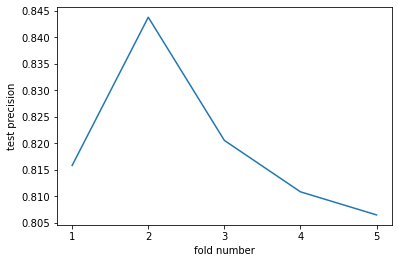

In [95]:
plt.plot(['1','2','3','4','5'], scores['test_precision'])
plt.ylabel('test precision')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

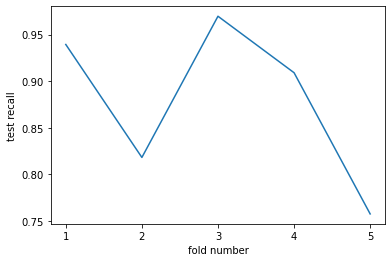

In [96]:
plt.plot(['1','2','3','4','5'], scores['test_recall'])
plt.ylabel('test recall')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

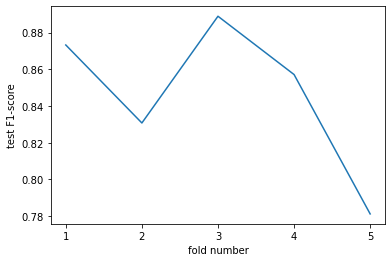

In [97]:
plt.plot(['1','2','3','4','5'], scores['test_f1_score'])
plt.ylabel('test F1-score')
plt.xlabel('fold number')

In [98]:
avg_precision = sum(scores['test_precision'])/len(scores['test_precision'])
avg_recall = sum(scores['test_recall'])/len(scores['test_recall'])
avg_f1_score = sum(scores['test_f1_score'])/len(scores['test_f1_score'])

In [99]:
print('precision=',avg_precision)
print('recall=',avg_recall)
print('f1-score=',avg_f1_score)

precision= 0.8194629435822135
recall= 0.8787878787878789
f1-score= 0.8462580826841389


In [100]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, y)

KNeighborsClassifier(n_neighbors=3)

In [101]:
scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [102]:
scores = cross_validate(neigh, data, y, cv=5, scoring=scoring)


In [103]:
avg_precision = sum(scores['test_precision'])/len(scores['test_precision'])
avg_recall = sum(scores['test_recall'])/len(scores['test_recall'])
avg_f1_score = sum(scores['test_f1_score'])/len(scores['test_f1_score'])

In [104]:
print('precision=',avg_precision)
print('recall=',avg_recall)
print('f1-score=',avg_f1_score)

precision= 0.8144588499596989
recall= 0.8545454545454547
f1-score= 0.8329898781591354


In [105]:
nneighs = [5, 10, 15, 20, 30]
recalls = []
precisions = []
f1_scores = []
accs = []

In [106]:
from sklearn.neighbors import KNeighborsClassifier
for i in nneighs:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(data, y)
    
    scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            'accuracy' : make_scorer(accuracy_score)}
    scores = cross_validate(neigh, data, y, cv=5, scoring=scoring)
    precisions.append(sum(scores['test_precision'])/len(scores['test_precision']))
    recalls.append(sum(scores['test_recall'])/len(scores['test_recall']))
    f1_scores.append(sum(scores['test_f1_score'])/len(scores['test_f1_score']))
    accs.append(sum(scores['test_accuracy'])/len(scores['test_accuracy']))

Text(0.5, 0, 'fold number')

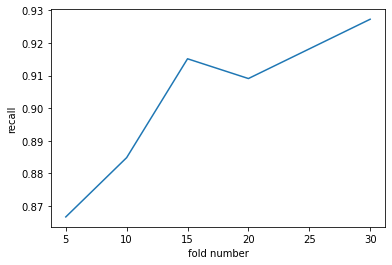

In [107]:
plt.plot(nneighs, recalls)
plt.ylabel('recall')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

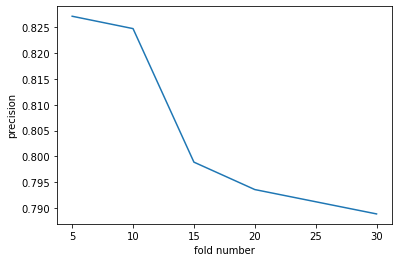

In [108]:
plt.plot(nneighs, precisions)
plt.ylabel('precision')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

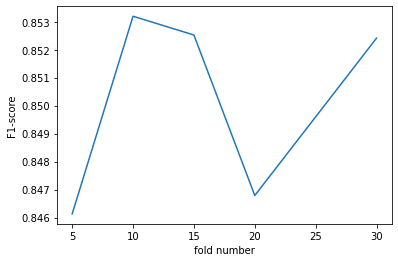

In [109]:
plt.plot(nneighs, f1_scores)
plt.ylabel('F1-score')
plt.xlabel('fold number')

In [110]:
nneighs = [5, 10, 15, 20, 30]
recalls = []
precisions = []
f1_scores = []
accs = []

In [112]:
from sklearn.neighbors import KNeighborsClassifier
for i in nneighs:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(data, y)
    
    scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            'accuracy' : make_scorer(accuracy_score)}
    scores = cross_validate(neigh, data[['chol','thalach','trestbps']], y, cv=5, scoring=scoring)
    precisions.append(sum(scores['test_precision'])/len(scores['test_precision']))
    recalls.append(sum(scores['test_recall'])/len(scores['test_recall']))
    f1_scores.append(sum(scores['test_f1_score'])/len(scores['test_f1_score']))
    accs.append(sum(scores['test_accuracy'])/len(scores['test_accuracy']))

Text(0.5, 0, 'fold number')

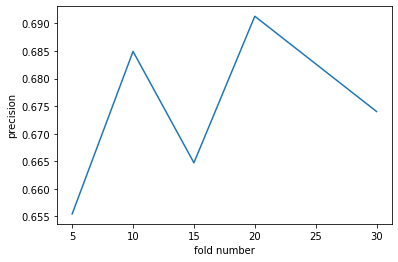

In [113]:
plt.plot(nneighs, precisions)
plt.ylabel('precision')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

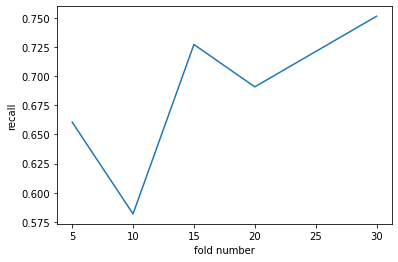

In [114]:
plt.plot(nneighs, recalls)
plt.ylabel('recall')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

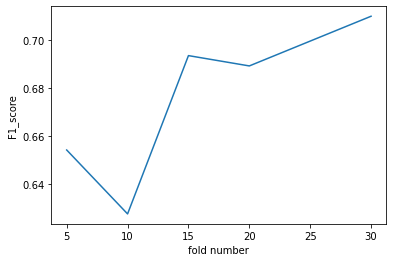

In [115]:
plt.plot(nneighs, f1_scores)
plt.ylabel('F1_score')
plt.xlabel('fold number')